<a href="https://colab.research.google.com/github/brroavendano/test-churn/blob/main/Ejercicio_6_Clasificaci%C3%B3n_No_Supervisada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 6 - Clasificación No-Supervisada

Esta actividad propone trabajar con clasificación no-supervisada o clustering sobre un dataset de información de un censo con diferentes atributos. En particular. 

## Contexto: Análisis de éxito en campaña de marketing

Fuente: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El foco está en la implementación de una red neuronal para clasificación y la comparación de su desempeño con otro modelo de clasificación para predicir el valor de un atributo, desde un *dataset* de información de un resultados de personas contactadas por una campaña de marketing y que compraron la oferta (atributo "OK"), con cerca de 41.200 registros de personas contactadas.

Este conjunto de datos (abierto para este tipo de usos instruccionales), consiste en 20 atributos y 1 clase de etiquetas (totalizando 21 columnas) y corresponde a los datos de una campaña telefónica a diversos clientes en Portugal, ofreciéndoles la compra de un producto bancario. En varios casos, un cliente fue contactado varias veces antes de aceptar el el depósito a plazo ofrecido por la campaña (OK = yes). 

Algunos de los atributos relevantes son (combinando atributos categóricos, con numéricos):
* **Datos personales**: Edad, Ocupación, Estado Civil, Nivel de Educación.
* **Datos financieros**: Su casa tiene crédito hipotecario, default: si el crédito ha caído en quiebra; tiene un crédito de consumo.
* **Datos de contactos de la campaña actual**: Tipo de Comunicación (celular o teléfono fijo); Mes del último contacto; Día de la semana del contacto; duración de la llamada (segundos); Contacto: N° de contactos durante la campaña; DíasAtrás: días transcurridos desde último contacto; Resultado: resultado de la última llamada (falló, no-existe, éxito)
* **Datos socioeconómicos**: EmpTasaVar: tasa de variación de empleabilidad; IPC: índice de precios consumidor mensual; ICC: índice de confianza consumidor mensual; Euribor3m: tasa euribor de 3 meses indicador diario; NumEmpleados: cantidad de gente empleada, en indicador trimestral. 

Esta adaptación en particular, por el equipo de R:Solver (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Big Data y Machine Learning.


**INSTRUCCIONES IMPORTANTES**
1.   Todos los alumnos, ya sea en grupo, o individualmente (si no tienen compañeros), deben contestar las preguntas que se indican en las secciones de "Ejercicio", más adelante.
3.   **Se tiene hasta la fecha tope acordada para enviar el email a nombre del grupo.**

El formato del email es:

To: rsandova@ing.puc.cl

Subject: Ejercicio Clustering aaaammdd

Integrantes: (nombres apellidos en orden alfabético)

Respuestas: puede ser parte del cuerpo del email o en un archivo PDF separado

...

---




## Actividad Complementaria: Instalar librerías de modelos de clasificación y herramientas

In [1]:
install.packages('e1071')
install.packages('caret')
install.packages('caTools')
install.packages('corrplot')
install.packages('fpc')
install.packages('cluster')
install.packages('dbscan')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/

In [2]:
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Actividad Complementaria: Carga de los datos y preprocesamiento

La siguiente celda de código carga los datos desde la URL de origen y luego muestra un encabezado con las primeras filas del dataset, para demostrar la disponibilidad de los datos. Nótese que esta versión de los datos está adaptada a trabajar mayormente con valores numéricos.

In [3]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://www.rsolver.com/dcc/docs/bank-additional-full-numbers.csv"

# Se declaran los nombres de las columnas
columnas = c("Edad","Ocupación","EstadoCivil","Educación","Default","Hipotecario","Consumo","Contacto","Mes","Día",
             "Duración","NumContactos","DíasAtrás","Previo","ResultadoPrevio", "EmpTasaVar", "IPC", "ICC", "Euribor3m", "NumEmpleados", "OK")

# Se cargan datos principales a una estructura (marketing.data), asignando nombres de atributos a las columnas
marketing.data <- read.table(file = theUrlMain, header = TRUE, sep = ";", col.names = columnas, na.strings = c("unknown","NA"))

# Se eliminan los registros que tienen algún NA (unknown)
marketing.data <- na.omit(marketing.data) # Sólo quedan poco más de 30.000 filas (de las 41.000 originales)

summary(marketing.data)


      Edad        Ocupación         EstadoCivil         Educación        
 Min.   :17.00   Length:30488       Length:30488       Length:30488      
 1st Qu.:31.00   Class :character   Class :character   Class :character  
 Median :37.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :39.03                                                           
 3rd Qu.:45.00                                                           
 Max.   :95.00                                                           
    Default          Hipotecario        Consumo         Contacto        
 Min.   :0.00e+00   Min.   :0.0000   Min.   :0.0000   Length:30488      
 1st Qu.:0.00e+00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :0.00e+00   Median :1.0000   Median :0.0000   Mode  :character  
 Mean   :9.84e-05   Mean   :0.5419   Mean   :0.1564                     
 3rd Qu.:0.00e+00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :1.00e+00   Max.   :1.0000   Max.   

## Complemento: visualización de la correlación entre algunas de las variables

En el siguiente segmento de código se usa la librería corrplot para visualizar correlaciones sólo entre los atributos numéricos del dataset, que puede ayudar a determinar cuál es de ellos serían los ideales de usar en la ejecución de HDBSCAN, más adelante.

corrplot 0.90 loaded



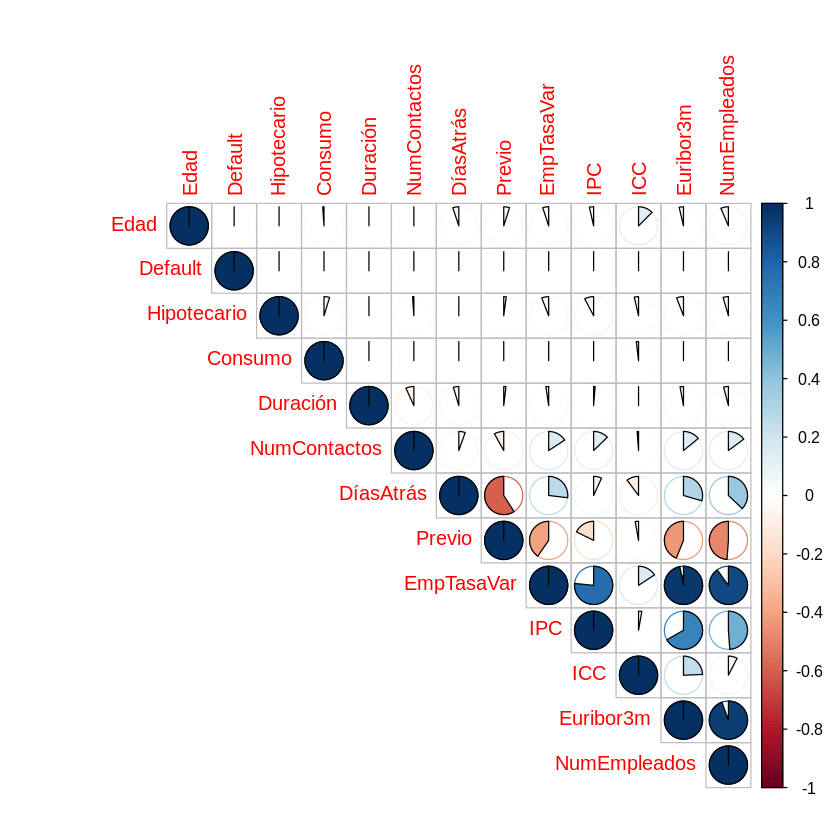

In [4]:
library("corrplot")

# referencia: https://cran.r-project.org/web/packages/dbscan/vignettes/hdbscan.html
# En este caso sólo se correlacionan las variables numéricas
cor <- cor(marketing.data[c(1, 5:7, 11:14, 16:20)])
corrplot(cor, method = "pie", type ="upper")

In [5]:
library(rpart)
library(rpart.plot)

In [86]:
tree.model <- rpart(OK ~ Edad + Default + Hipotecario + Consumo + Duración + NumContactos + DíasAtrás + Previo + IPC + ICC + Euribor3m + NumEmpleados + EmpTasaVar,
                 data = marketing.data,
                 method = "class",
                 parms = list(split = "gini"),
                 control = rpart.control(minsplit = 1,
                                         minbucket = 1,
                                         maxdepth = 5,
                                         cp = 0))


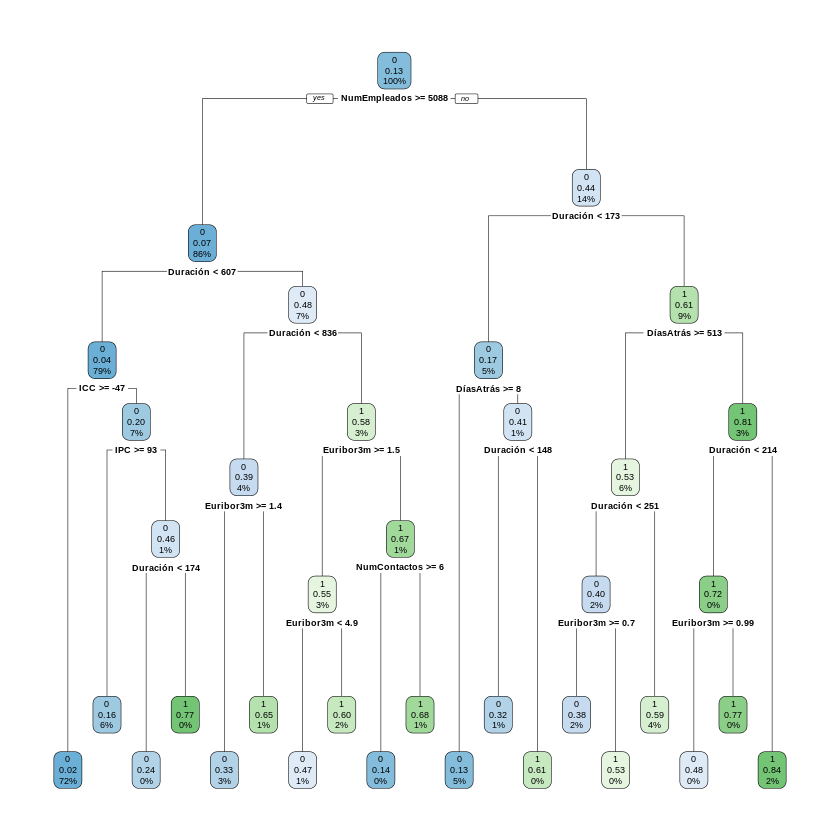

In [87]:
rpart.plot(tree.model)

In [8]:
tree.model2 <- rpart(OK ~ . ,
                 data = marketing.data,
                 method = "class",
                 parms = list(split = "gini"),
                 control = rpart.control(minsplit = 1,
                                         minbucket = 1,
                                         maxdepth = 5,
                                         cp = 0))

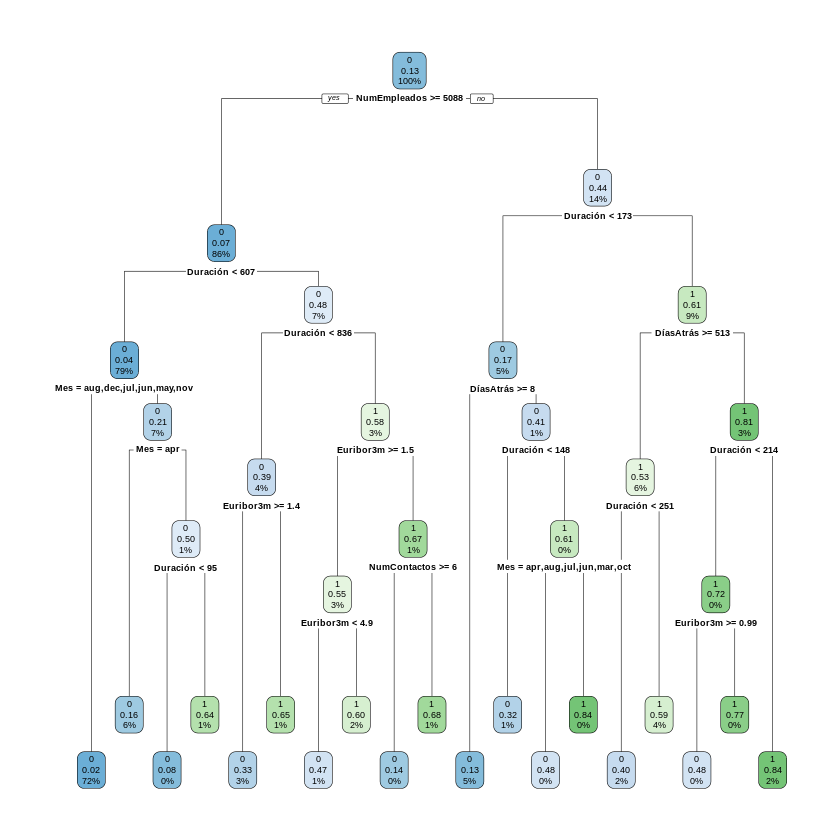

In [9]:
rpart.plot(tree.model2)

## Ejercicio: Realizar una buena segmentación e interpretar resultados

El objetivo de ejecutar una segmentación o clustering es determinar automáticamente los conjuntos que contienen individuos con características similares. En el contexto del caso de análisis (clientes de campaña marketing de banco) se vuelve interesante producir una segmentación con pocos clústers, para -eventualmente- facilitar el análisis de cada clúster en forma individual. Por ello, se define que el resultado esperado es de entre 4 y 15 clústers, incluyendo el grupo de los "ruidosos" (*noise*) y que los conjuntos (salvo el de los ruidosos) sean relativamente balanceados.

Entonces, a continuación se tienen las líneas de código que generan una primera segmentación, la cual hay que refinar, buscando dos objetivos:

**OBJETIVO 1 (4 puntos)**

Buscar una configuración del proceso que encuentre clústers que mejor segmentan los datos.

Esto plantea ir probando combinaciones de:

-     Cuáles tres atributos del total de atributos son los que logran producir los mejores(*) conjuntos finales. Se propone correr el modelo con tríos de atributos para ver cuál logra mejores resultados. (Pueden usar como referencia la información que entrega el plot de correlación anterior, para acotar las posibles combinaciones)
-     El valor del parámetro minPts del algoritmo HDBSCAN. Se propone probar valores: 5, 10, 50, 100.

(*) Se define los mejores conjuntos finales como:

-    Los grupos o clusters son relativamente balanceados en cantidad de elementos (ningún clúster tiene más del 30% del total de datos).
-    La cantidad de puntos de ruido (*noise*) no es más que un 10% del total de puntos.

**OBJETIVO 2 (2 puntos)**

Describir las características de los clusters en relación a los valores de sus atributos más comunes o promediados. La idea es poder obtener una interpretación más clara de qué caracteriza a cada uno de los clusters.

Esta interpretación puede perfectamente ser una declaración verbal de la siguiente forma:

"Los clusters resultantes evidencian un balance, donde sólo hay un único cluster dominante, aunque no tiene más del 30% de los elementos, lo que se interpreta como que ese cluster representa a los clientes más representativos en sus atributos en general. Del gráfico ClusPlot se puede apreciar una cierta uniformidad entre los datos de los respectivos clusters. ... "

Finalmente, se espera que los alumnos puedan aprovechar estas (y/u otras) herramientas gráficas para realizar una interpretación general del resultado del proceso de clustering. 


In [84]:
library (dbscan)

# Ejercicio 1: determinar los atributos (elegir 3, además de OK) que mejor agrupen los datos de los clientes.
# Como ejemplo se usa la Edad, Consumo, NumEmpleados.
# Además elegir el valor de minPts que logre la cantidad esperada de clústers.
dataForClustering <- data.frame(marketing.data$ICC, marketing.data$NumEmpleados, marketing.data$Duración, marketing.data$OK)

# Ejecución de HDBSCAN (en este ejercicio toma menos de 30 seg)
clustering <- hdbscan(dataForClustering, minPts = 75)
summary(clustering)  # Muestra resumen, para avisar que terminó de ejecutar

                Length Class  Mode   
cluster         30488  -none- numeric
minPts              1  -none- numeric
cluster_scores     18  -none- numeric
membership_prob 30488  -none- numeric
outlier_scores  30488  -none- numeric
hc                  7  hclust list   

In [85]:
clustering

HDBSCAN clustering for 30488 objects.
Parameters: minPts = 75
The clustering contains 18 cluster(s) and 7501 noise points.

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
7501  209   85 1736 1152 6429   80  119   97 2062  114  207 5132   80   78  154 
  16   17   18 
1969  187 3097 

Available fields: cluster, minPts, cluster_scores, membership_prob,
                  outlier_scores, hc

HDBSCAN clustering for 30488 objects.
Parameters: minPts = 100
The clustering contains 3 cluster(s) and 20922 noise points.

    0     1     2     3 
20922   261  9177   128 

Available fields: cluster, minPts, cluster_scores, membership_prob,
                  outlier_scores, hc

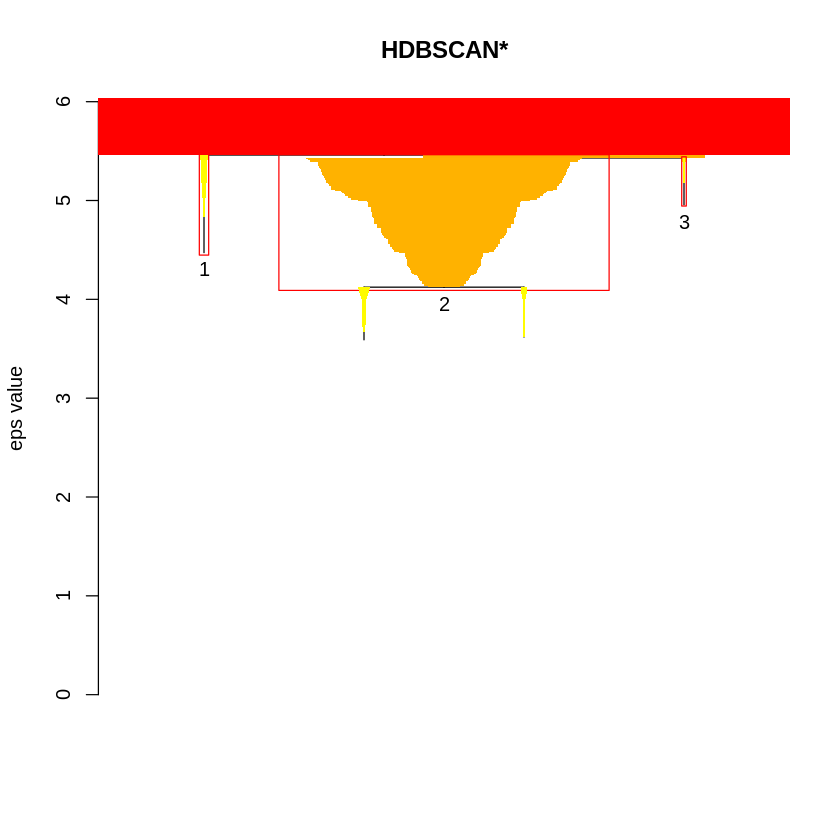


Attaching package: ‘fpc’


The following object is masked from ‘package:dbscan’:

    dbscan




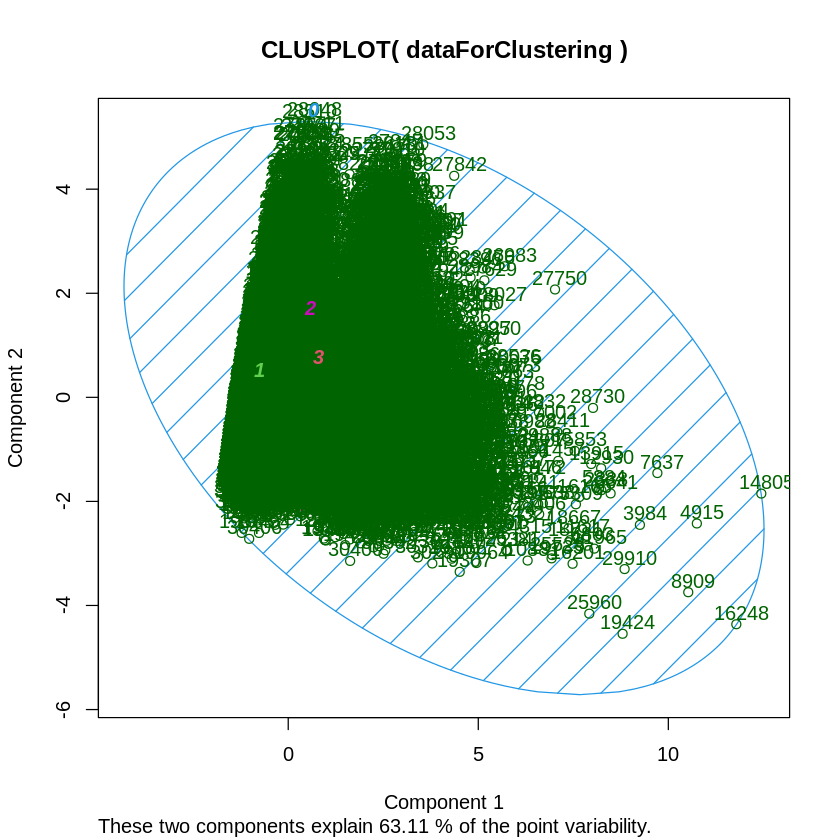

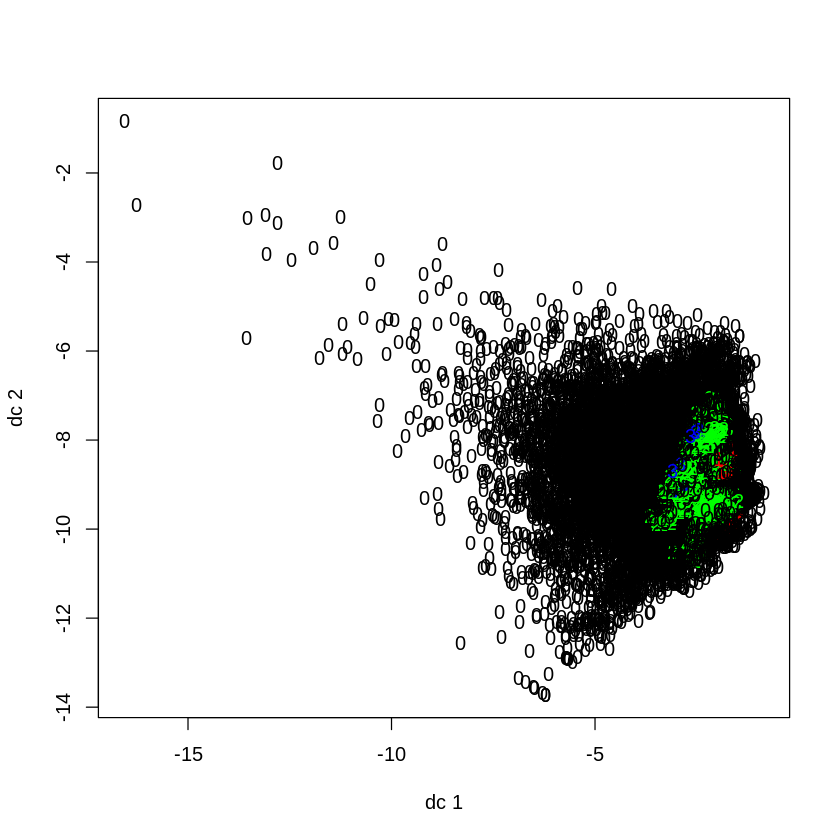

In [23]:
# Ejercicio 2: Visualización y Análisis
# Se presentan alternativas básicas de visualización, esperando que los alumnos las utilicen (y/u otras)
# para concluir una explicación razonable y adecuada del resultado.

# 1) Mostrar el resultado del clustering en forma de texto descriptivo
# Nota: el dataset "clustering" tiene columnas: cluster, minPts, cluster_scores, membership_prob, outliers_scores, hc
clustering

# 2) Usar el PLOT de Jerarquía para mostrar el Árbol HDBSCAN
# Referencia: https://cran.r-project.org/web/packages/dbscan/vignettes/hdbscan.html
plot(clustering, col=clustering$cluster+1, pch=20, show_flat = T, scale=5)
points(dataForClustering, pch=20)

# 3) Cluster Plot por los mejores 2 principal components
library(cluster)
clusplot(dataForClustering, clustering$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

# 4) Centroid Plot 
library(fpc)
plotcluster(dataForClustering, clustering$cluster)
